In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["font.size"] = 16

In [4]:
df = pd.read_csv("bet_each_round_march_randomness.csv")
df = df.loc[:,"rank":]
df

,rank,team_name,final_StatCoin_balance,bet_each_round,edu_level,competitor_type,day_1_guess,day_1_bet,day_1_total,day_2_guess,...,day_13_total,day_14_guess,day_14_bet,day_14_total,day_15_guess,day_15_bet,day_15_total,day_16_guess,day_16_bet,day_16_total
0,1,A Fraction Ahead,9000,yes,Pre-College,Team,Yes,300.0,3700.0,No,...,7300.0,Yes,1500.0,8800.0,No,100.0,8900.0,Yes,100.0,9000.0
1,2,Elidia R,8900,yes,Pre-College,Individual,Yes,1500.0,4000.0,No,...,6500.0,Yes,800.0,7300.0,No,800.0,8100.0,Yes,800.0,8900.0
2,3,Mathster's Stupefying 1 Stars,8400,yes,Pre-College,Team,Yes,800.0,3200.0,No,...,7100.0,No,300.0,6800.0,No,800.0,7600.0,Yes,800.0,8400.0
3,4,Dylan M,8000,yes,Pre-College,Individual,Yes,800.0,3200.0,No,...,5600.0,Yes,800.0,6400.0,No,800.0,7200.0,Yes,800.0,8000.0
4,4,J Fly Money,8000,yes,Pre-College,Individual,Yes,800.0,3200.0,No,...,7200.0,No,800.0,6400.0,No,800.0,7200.0,Yes,800.0,8000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,3 StDev Above Mu,2000,yes,Pre-College,Team,Yes,300.0,3700.0,No,...,1200.0,No,800.0,400.0,No,800.0,1200.0,Yes,800.0,2000.0
86,87,The Fluffy-Floofy Bears,1800,yes,College,Individual,Yes,1500.0,4000.0,No,...,2600.0,No,800.0,1800.0,No,800.0,2600.0,No,800.0,1800.0
87,88,The Gram,1600,yes,Pre-College,Team,Yes,800.0,3200.0,No,...,2400.0,Yes,800.0,3200.0,Yes,800.0,2400.0,No,800.0,1600.0
88,89,silly snakes,1400,yes,Pre-College,Team,Yes,800.0,3200.0,No,...,1700.0,No,300.0,1400.0,No,800.0,2200.0,No,800.0,1400.0


In [5]:
total_bets = df["day_1_bet"]
for day in range(2,17):
    total_bets += df["day_" + str(day) + "_bet"]
total_bets/16

0     450.00
1     800.00
2     687.50
3     843.75
4     843.75
       ...  
85    506.25
86    506.25
87    781.25
88    643.75
89    587.50
Name: day_1_bet, Length: 90, dtype: float64

In [6]:
fig_2_df = pd.DataFrame({"final_StatCoin_balance": df["final_StatCoin_balance"],
                        "average_StatCoin_bet": total_bets/16})
fig_2_df

,final_StatCoin_balance,average_StatCoin_bet
0,9000,450.00
1,8900,800.00
2,8400,687.50
3,8000,843.75
4,8000,843.75
...,...,...
85,2000,506.25
86,1800,506.25
87,1600,781.25
88,1400,643.75


<AxesSubplot:xlabel='average_StatCoin_bet', ylabel='final_StatCoin_balance'>

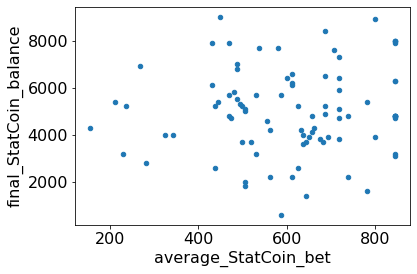

In [7]:
fig_2_df.plot.scatter(x="average_StatCoin_bet", y="final_StatCoin_balance")

Text(0, 0.5, 'inertia (mean sum of squares of residuals)')

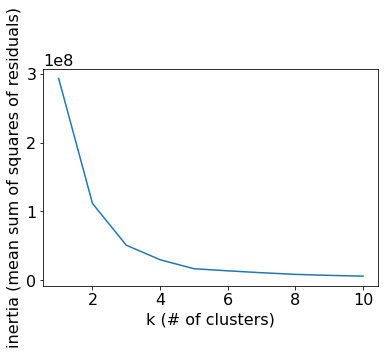

In [8]:
scores = pd.Series(dtype=float)

for k in range(1,11): # do this to avoid 0 clusters
    km = KMeans(n_clusters=k)
    km.fit(fig_2_df)
    scores.loc[k] = km.inertia_

ax = scores.plot.line()
ax.set_xlabel("k (# of clusters)")
ax.set_ylabel("inertia (mean sum of squares of residuals)")

In [9]:
km = KMeans(n_clusters=5)
fig_2_df = fig_2_df.copy()
fig_2_df["cluster"] = km.fit_predict(fig_2_df)
fig_2_df

,final_StatCoin_balance,average_StatCoin_bet,cluster
0,9000,450.00,0
1,8900,800.00,0
2,8400,687.50,0
3,8000,843.75,0
4,8000,843.75,0
...,...,...,...
85,2000,506.25,1
86,1800,506.25,1
87,1600,781.25,1
88,1400,643.75,1


In [10]:
fig, ax = plt.subplots(figsize=(8, 5))

fig_2_df.plot.scatter(x="average_StatCoin_bet",
                           y="final_StatCoin_balance",
                           c=fig_2_df["cluster"],
                      cmap="tab10",
                      ax=ax)


centroids = pd.DataFrame(km.cluster_centers_)
centroids.plot.scatter(x=1, y=0, c="red", s=100, ax=ax)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
    
ax.set_ylabel("Final StatCoin Amount")
ax.set_xlabel("Average StatCoin Bet")

ax.set_title("Figure 2: K-Means Clustering")

fig = ax.get_figure()

fig.savefig("figure_2.png", dpi=300, bbox_inches="tight")
plt.close()

In [11]:
print(centroids[1][0] - centroids[1][4])
centroids

85.69004524886873


,0,1
0,8023.076923,673.557692
1,2000.000000,571.022727
2,5000.000000,623.842593
3,3795.454545,588.352273
4,6258.823529,587.867647
